In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

### Data

In [2]:
# https://drive.google.com/file/d/1eTn_pK1awSlmRnpGSSX_WnT5JKcyTPGq/view?usp=sharing
!pip install --upgrade --no-cache-dir gdown
!gdown 1eTn_pK1awSlmRnpGSSX_WnT5JKcyTPGq
!gdown 1U1KykX3TcLdIFBZScLxIw2w-GVcrFZZ8

  Attempting uninstall: gdown
    Found existing installation: gdown 5.1.0
    Uninstalling gdown-5.1.0:
      Successfully uninstalled gdown-5.1.0
Downloading...
From: https://drive.google.com/uc?id=1eTn_pK1awSlmRnpGSSX_WnT5JKcyTPGq
To: /content/GolfTest.csv
100% 132/132 [00:00<00:00, 434kB/s]
Downloading...
From: https://drive.google.com/uc?id=1U1KykX3TcLdIFBZScLxIw2w-GVcrFZZ8
To: /content/Golf.csv
100% 435/435 [00:00<00:00, 914kB/s]


In [3]:
data = pd.read_csv('/content/Golf.csv')
data

,Outlook,Temperature,Humidity,Wind,Play Golf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [4]:
data.columns = ['outlook', 'temperature', 'humidity', 'wind', 'play']
data

,outlook,temperature,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


### Model

#### * Entropy

\begin{align}
\text{Entropy}(Y) = -\sum_{i=1}^{C} p_i \log_2(p_i)
\end{align}

In [6]:
labels = data['play']
len(labels), labels.unique(), labels.value_counts()
p = labels.value_counts() / len(labels)
-sum(p * np.log2(p))

0.9402859586706311

In [7]:
def entropy(labels):
    p = labels.value_counts() / len(labels)
    return -sum(p * np.log2(p))

In [8]:
entropy(data['play'])

0.9402859586706311

#### * Information Gain

\begin{align}
\text{Information Gain}(\text{Feature}) = \text{Entropy}(\text{Parent}) - \sum_{\text{value} \in \text{Feature}} \frac{|\text{Subset with value}|}{|\text{Parent}|} \times \text{Entropy}(\text{Subset with value})
\end{align}

In [9]:
target = 'play'
entropy_parent = entropy(data[target])
entropy_parent

entropy_child = 0
feature = 'wind'
for value in data[feature].unique():
    subset = data[data[feature] == value]
    display(subset)
    wi = len(subset) / len(data)
    entropy_child += wi * entropy(subset[target])
information_gain = entropy_parent - entropy_child

print(information_gain)

,outlook,temperature,humidity,wind,play
0,Sunny,Hot,High,Weak,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes
12,Overcast,Hot,Normal,Weak,Yes


,outlook,temperature,humidity,wind,play
1,Sunny,Hot,High,Strong,No
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
10,Sunny,Mild,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
13,Rain,Hot,High,Strong,No


0.04812703040826949


In [10]:
def information_gain(data, feature, target):
    # Entropy of parent
    entropy_parent = entropy(data[target])

    # Entropy of child
    entropy_child = 0
    for value in data[feature].unique():
        subset = data[data[feature] == value]
        wi = len(subset) / len(data)
        entropy_child += wi * entropy(subset[target])

    return entropy_parent - entropy_child

In [11]:
information_gain(data, 'wind', 'play')

0.04812703040826949

In [12]:
information_gain(data, 'humidity', 'play')

0.15183550136234159

In [13]:
information_gain(data, 'outlook', 'play')

0.24674981977443933

In [14]:
information_gain(data, 'temperature', 'play')

0.10389267691729642

In [15]:
data.iloc[:, :-1].columns

Index(['outlook', 'temperature', 'humidity', 'wind'], dtype='object')

In [16]:
[information_gain(data, feature, 'play') for feature in data.iloc[:, :-1].columns]

[0.24674981977443933,
 0.10389267691729642,
 0.15183550136234159,
 0.04812703040826949]

In [17]:
np.argmax([information_gain(data, feature, 'play') for feature in data.iloc[:, :-1].columns])

0

#### * Decision Tree & Node

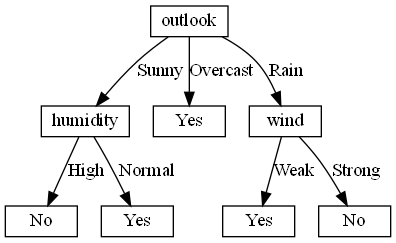

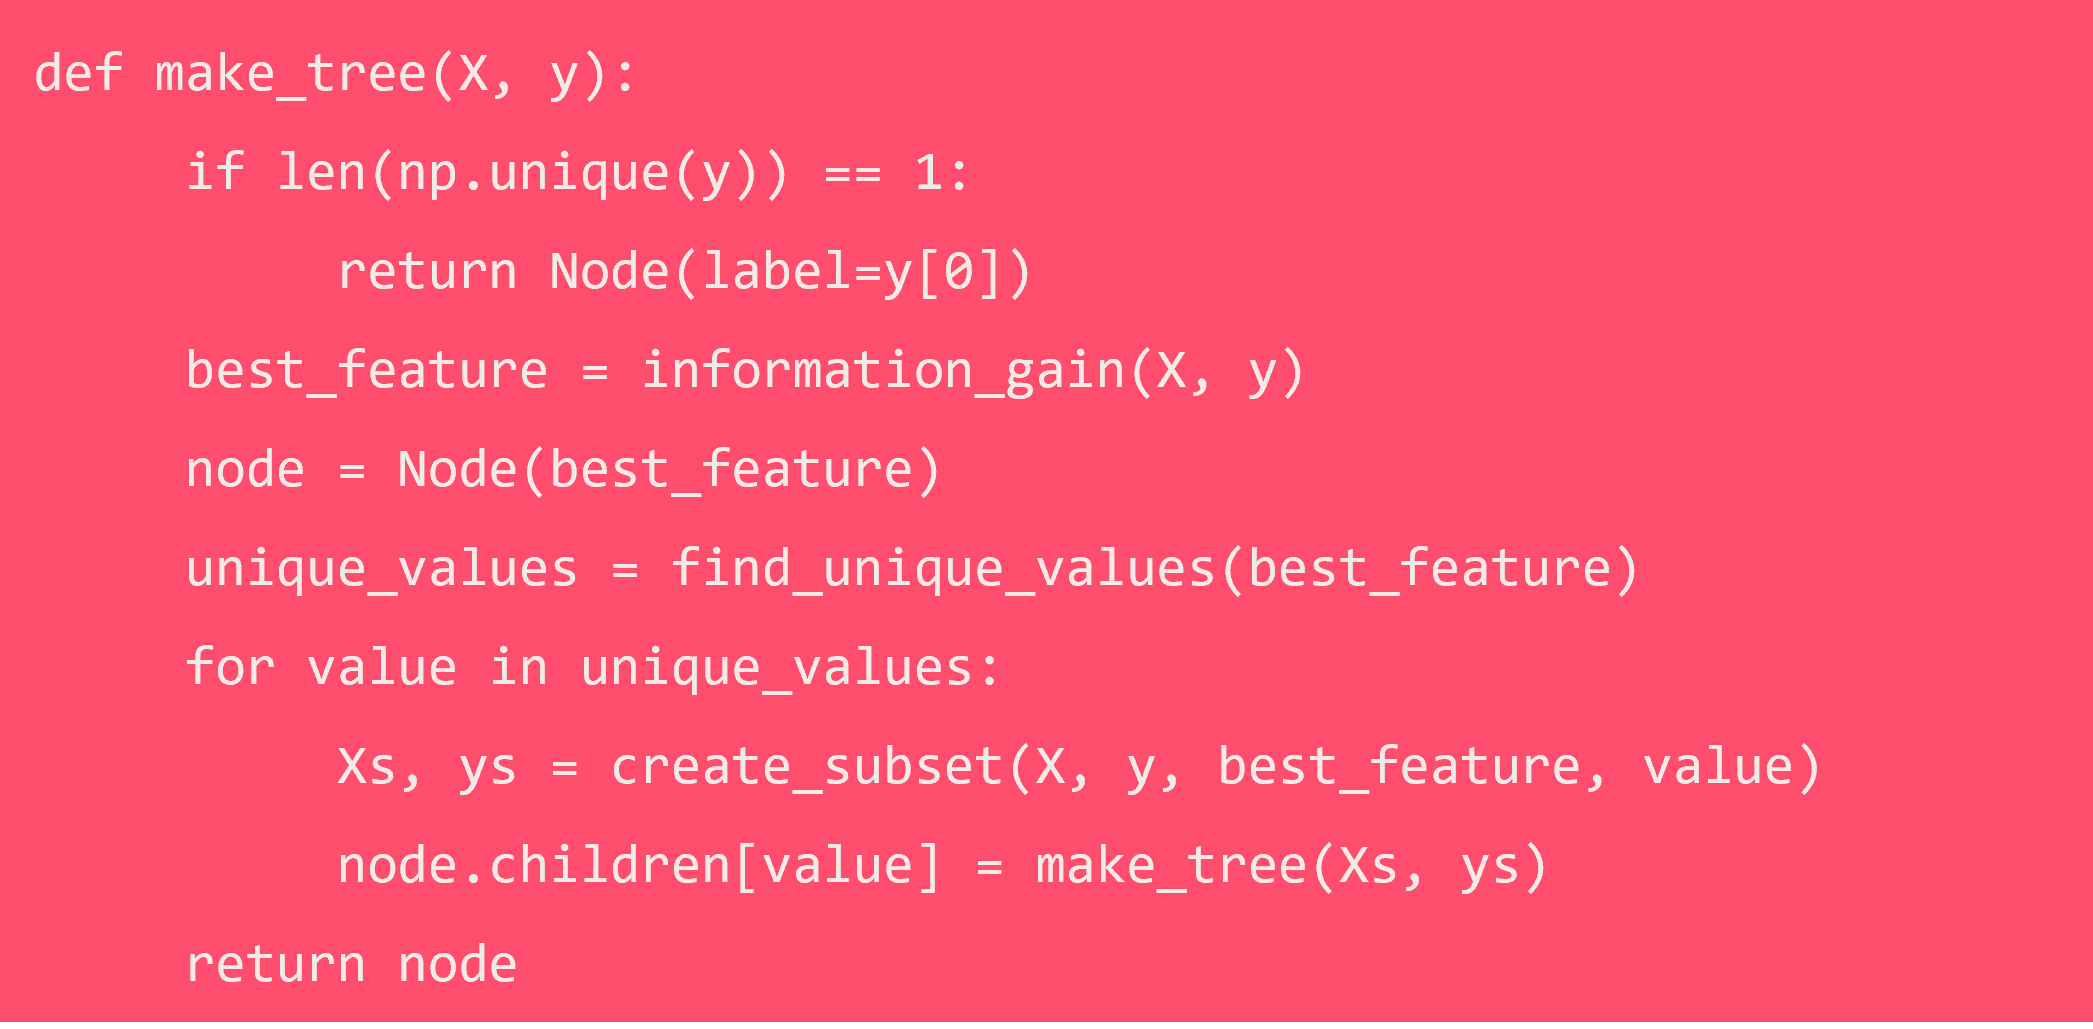

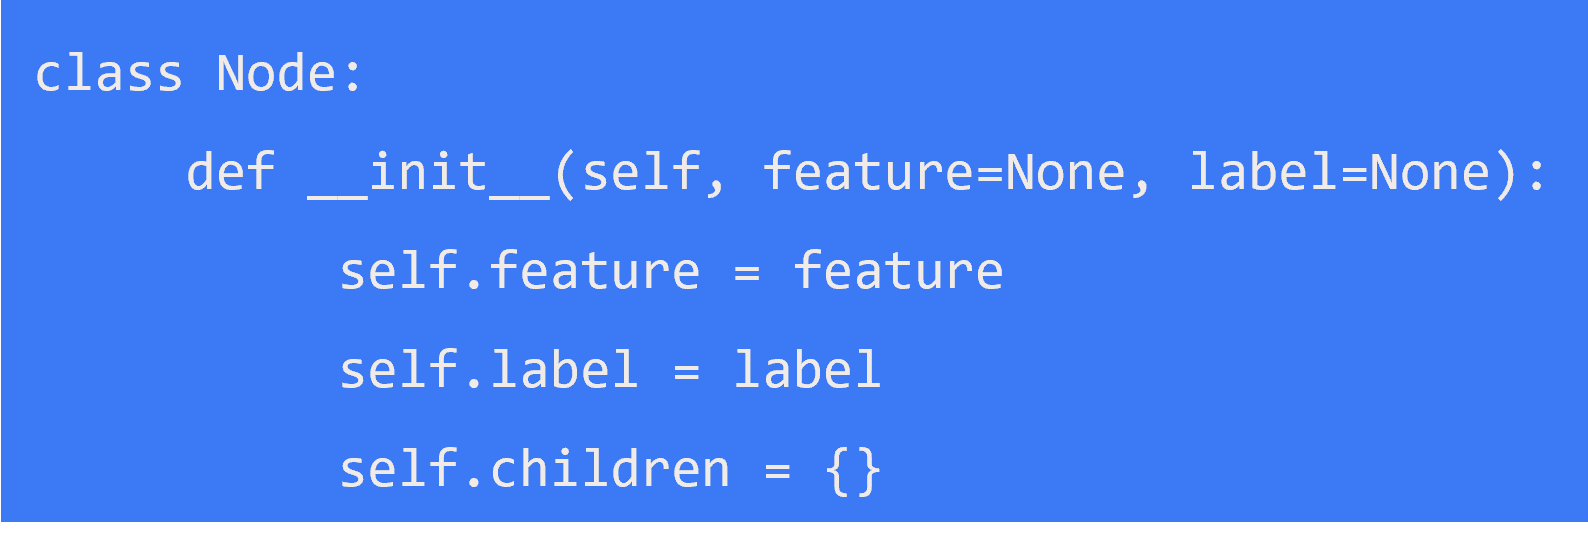

In [18]:
class Node:

    def __init__(self, feature=None, label=None):
        self.feature = feature
        self.label = label
        self.children = {}

    def __repr__(self):
        if self.feature is not None:
            return f'DecisionNode(feature="{self.feature}", children={self.children})'
        else:
            return f'LeafNode(label="{self.label}")'

Node(label='wind')
# Node(label='yes')

LeafNode(label="wind")

In [19]:
def make_tree(data, target):
  # Leaf Node?
  if len(data[target].unique()) == 1:
    return Node(label = data[target].iloc[0])

  # Calculate IG
  features = data.drop(target, axis=1).columns
  gains = [information_gain(data, feature, target) for feature in features]

  # Greedy Search for findinf Best Feature
  max_gain_idx = np.argmax(gains)
  best_feature = features[max_gain_idx]

  # Make a Node
  node = Node(feature = best_feature)

  # Loop over the Best Feature
  for value in data[best_feature].unique():
    subset = data[data[best_feature] == value].drop(best_feature, axis=1)
    display(subset)

    node.children[value] = make_tree(subset, target)

  return node

make_tree(data, 'play')

,temperature,humidity,wind,play
0,Hot,High,Weak,No
1,Hot,High,Strong,No
7,Mild,High,Weak,No
8,Cool,Normal,Weak,Yes
10,Mild,Normal,Strong,Yes


,temperature,wind,play
0,Hot,Weak,No
1,Hot,Strong,No
7,Mild,Weak,No


,temperature,wind,play
8,Cool,Weak,Yes
10,Mild,Strong,Yes


,temperature,humidity,wind,play
2,Hot,High,Weak,Yes
6,Cool,Normal,Strong,Yes
11,Mild,High,Strong,Yes
12,Hot,Normal,Weak,Yes


,temperature,humidity,wind,play
3,Mild,High,Weak,Yes
4,Cool,Normal,Weak,Yes
5,Cool,Normal,Strong,No
9,Mild,Normal,Weak,Yes
13,Hot,High,Strong,No


,temperature,humidity,play
3,Mild,High,Yes
4,Cool,Normal,Yes
9,Mild,Normal,Yes


,temperature,humidity,play
5,Cool,Normal,No
13,Hot,High,No


DecisionNode(feature="outlook", children={'Sunny': DecisionNode(feature="humidity", children={'High': LeafNode(label="No"), 'Normal': LeafNode(label="Yes")}), 'Overcast': LeafNode(label="Yes"), 'Rain': DecisionNode(feature="wind", children={'Weak': LeafNode(label="Yes"), 'Strong': LeafNode(label="No")})})

In [20]:
def make_tree(data, target):
    # leaf node?
    if len(data[target].unique()) == 1:
        return Node(label=data[target].iloc[0])

    features = data.drop(target, axis=1).columns
    if len(features) == 0 or len(data) == 0:
        return Node(label=data[target].mode()[0])

    # calculate information gain
    gains = [information_gain(data, feature, target) for feature in features]

    # greedy search to find best feature
    max_gain_idx = np.argmax(gains)
    best_feature = features[max_gain_idx]

    # make a node
    node = Node(feature=best_feature)

    # loop over the best feature
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value].drop(best_feature, axis=1)
        # display(subset)

        node.children[value] = make_tree(subset, target)

    return node

In [21]:
tree = make_tree(data, 'play')
tree

DecisionNode(feature="outlook", children={'Sunny': DecisionNode(feature="humidity", children={'High': LeafNode(label="No"), 'Normal': LeafNode(label="Yes")}), 'Overcast': LeafNode(label="Yes"), 'Rain': DecisionNode(feature="wind", children={'Weak': LeafNode(label="Yes"), 'Strong': LeafNode(label="No")})})

In [22]:
tree.feature

'outlook'

### Evaluation

In [23]:
data_test = pd.read_csv('/content/GolfTest.csv')
data_test.columns = ['outlook', 'temperature', 'humidity', 'wind', 'play']
data_test

,outlook,temperature,humidity,wind,play
0,Overcast,Mild,High,Weak,Yes
1,Rain,Cool,Normal,Strong,No
2,Sunny,Hot,Normal,Weak,Yes


In [24]:
def predict(node, sample):
    if node.feature is None:
        return node.label

    feature_value = sample[node.feature]

    if feature_value in node.children:
        return predict(node.children[feature_value], sample)
    else:
        return node.label

[predict(tree, sample) for _, sample in data_test.iterrows()]

['Yes', 'No', 'Yes']

### Visualization

In [25]:
from graphviz import Digraph, nohtml

g = Digraph('g', filename='decision-tree.gv', node_attr={'shape': 'record', 'height': '.1'})

def plot_tree(tree, g):
    root_node = tree.feature
    if root_node is None:
        return g
    g.node(root_node, nohtml(root_node))
    child_nodes = tree.children.keys()
    for i, child in enumerate(child_nodes):
        node = tree.children[child]
        name = node.feature if node.feature is not None else child+node.label
        label = node.feature if node.feature is not None else node.label
        g.node(name, nohtml(label))
        g.edge(root_node, name, label=child)
        plot_tree(node, g)
    return g

g = plot_tree(tree, g)
g.render('decision_tree', format='png', view=True)

'decision_tree.png'

## Decision Tree (sklearn)

In [26]:
from sklearn.datasets import load_iris
from sklearn import tree

### Classification

In [27]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [28]:
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42, ccp_alpha=0.1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.1, max_depth=3, random_state=42)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.05\nsamples = 39\nvalue = [0, 1, 38]')]

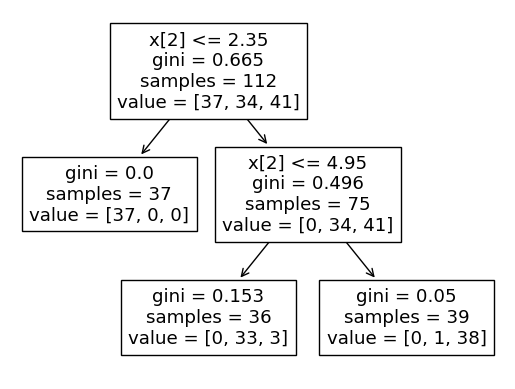

In [29]:
tree.plot_tree(clf)

In [30]:
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42, ccp_alpha=0.1, criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.1, criterion='entropy', max_depth=3,
                       random_state=42)

[Text(0.4, 0.875, 'x[2] <= 2.35\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.6, 0.625, 'x[2] <= 4.95\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.4, 0.375, 'x[3] <= 1.65\nentropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.6, 0.125, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.8, 0.375, 'entropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]')]

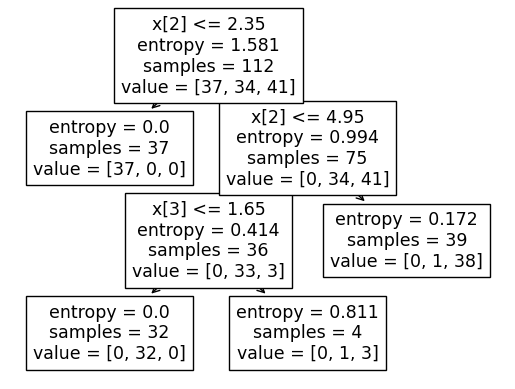

In [31]:
tree.plot_tree(clf)

In [32]:
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42, ccp_alpha=0.1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.1, max_depth=3, random_state=42)

#### * Plot DT

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.05\nsamples = 39\nvalue = [0, 1, 38]')]

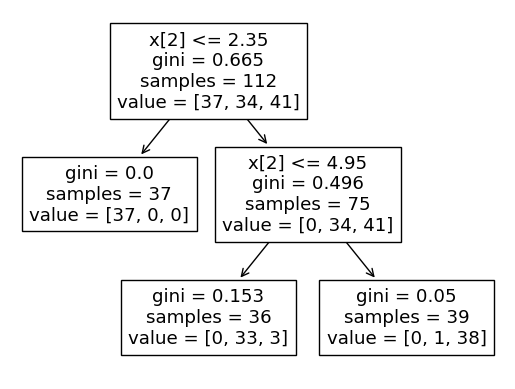

In [33]:
tree.plot_tree(clf)

#### * Attriubtes

In [34]:
clf.tree_.node_count
clf.tree_.n_leaves
clf.tree_.n_node_samples
clf.tree_.children_left
clf.tree_.children_right
clf.tree_.value
clf.tree_.feature
clf.tree_.threshold
clf.tree_.impurity
clf.tree_.max_depth

2

#### * Print DT

In [35]:
r = tree.export_text(clf)
print(r)

|--- feature_2 <= 2.35
|   |--- class: 0
|--- feature_2 >  2.35
|   |--- feature_2 <= 4.95
|   |   |--- class: 1
|   |--- feature_2 >  4.95
|   |   |--- class: 2



In [36]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [37]:
r = tree.export_text(clf, feature_names=iris['feature_names'])
print(r)

|--- petal length (cm) <= 2.35
|   |--- class: 0
|--- petal length (cm) >  2.35
|   |--- petal length (cm) <= 4.95
|   |   |--- class: 1
|   |--- petal length (cm) >  4.95
|   |   |--- class: 2



#### * Predict

In [38]:
clf.predict(X_test)
clf.score(X_test, y_test)
clf.predict_proba(X_test)

array([[0.        , 0.02564103, 0.97435897],
       [0.        , 0.91666667, 0.08333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02564103, 0.97435897],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02564103, 0.97435897],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.02564103, 0.97435897],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.91666667, 0.08333333],
       [0.        , 0.91666667, 0.08333333],
       [1.

In [39]:
i = 1
X_test[i]
decision_path = clf.decision_path(X_test[[i]])
decision_path.toarray()

array([[1, 0, 1, 1, 0]])

In [40]:
i = 1
decision_path = clf.decision_path(X_test[[i]])
print(decision_path.toarray())
clf.predict(X_test[[i]])

[[1 0 1 1 0]]


array([1])

In [41]:
X_test[i]

array([6. , 2.2, 4. , 1. ])

https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Regression

In [42]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1hYZIk005bo2uWuf_ZbTAdiii0lqqVUIl
!gdown 1XYG3y85Y-VBTskrd7x37laWgOYuvrj_s

Downloading...
From: https://drive.google.com/uc?id=1hYZIk005bo2uWuf_ZbTAdiii0lqqVUIl
To: /content/energy-train-l.csv
100% 47.0k/47.0k [00:00<00:00, 69.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XYG3y85Y-VBTskrd7x37laWgOYuvrj_s
To: /content/energy-test-l.csv
100% 11.8k/11.8k [00:00<00:00, 17.3MB/s]


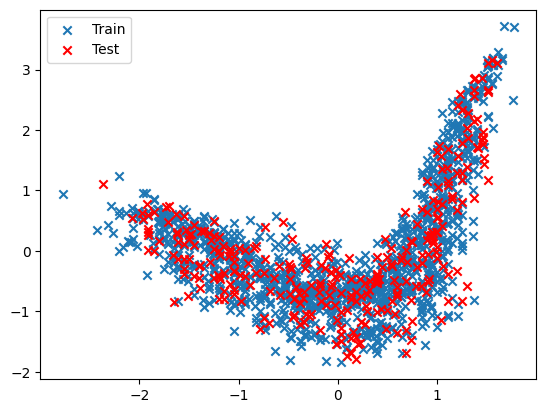

In [43]:
df = pd.read_csv('/content/energy-train-l.csv')
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv('/content/energy-test-l.csv')
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

plt.scatter(x_train, y_train, marker='x')
plt.scatter(x_test, y_test, c='r', marker='x')

plt.legend(['Train', 'Test'])

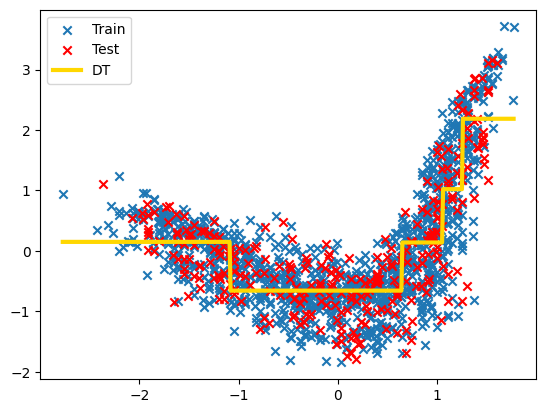

In [44]:
depth = 4
reg = tree.DecisionTreeRegressor(max_depth=depth, ccp_alpha = 0.05)
reg.fit(x_train, y_train)

# Generate data points for plotting
xp = np.arange(x_train.min(), x_train.max(), 0.01)[:, np.newaxis]
yp = reg.predict(xp)

plt.scatter(x_train, y_train, marker='x')
plt.scatter(x_test, y_test, c='r', marker='x')
plt.plot(xp, yp, color='gold', linewidth=3)

plt.legend(['Train', 'Test', 'DT'])

In [45]:
reg.score(x_train, y_train), reg.score(x_test, y_test)

(0.6786002767516198, 0.6102814513496133)

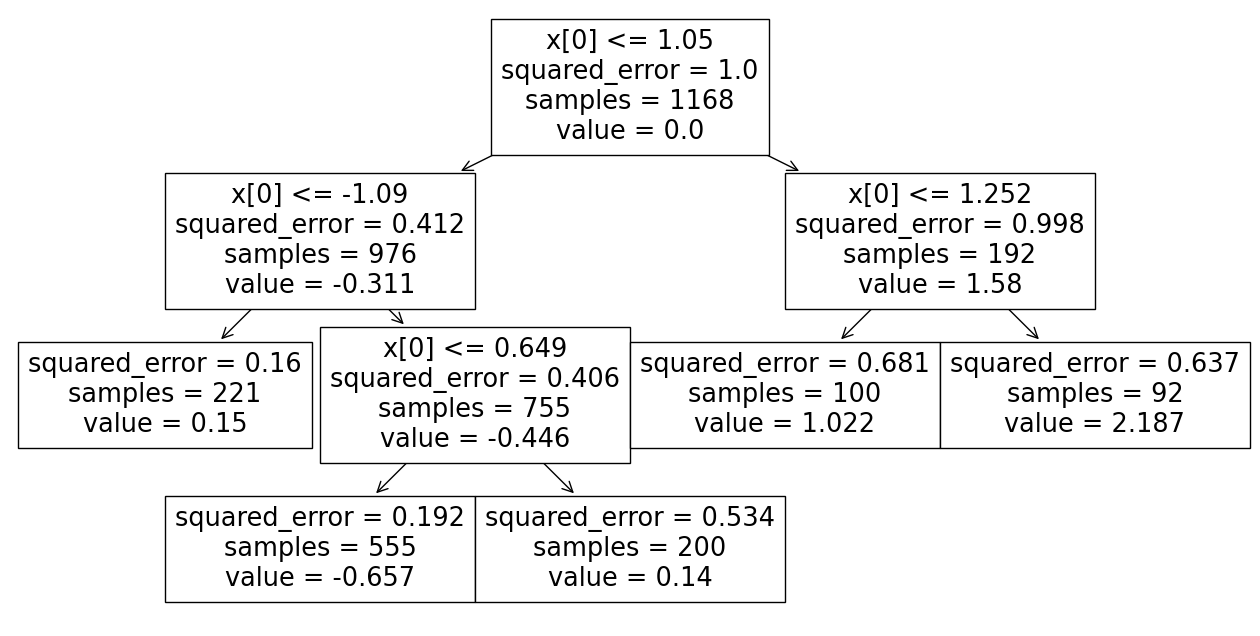

In [46]:
plt.figure(figsize=(16, 8))
tree.plot_tree(reg);

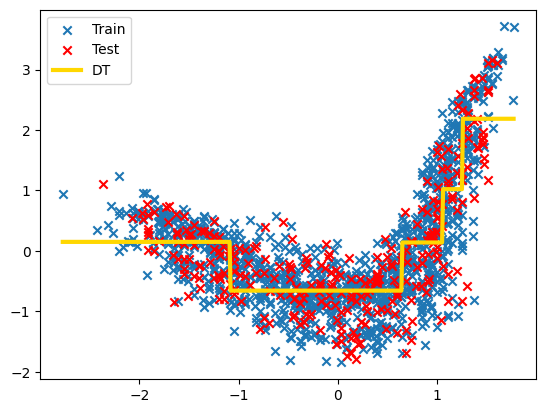

In [47]:
depth = 4
reg = tree.DecisionTreeRegressor(max_depth=depth, ccp_alpha=0.05)
reg.fit(x_train, y_train)

# Generate data points for plotting
xp = np.arange(x_train.min(), x_train.max(), 0.01)[:, np.newaxis]
yp = reg.predict(xp)

plt.scatter(x_train, y_train, marker='x')
plt.scatter(x_test, y_test, c='r', marker='x')
plt.plot(xp, yp, color='gold', linewidth=3)

plt.legend(['Train', 'Test', 'DT'])

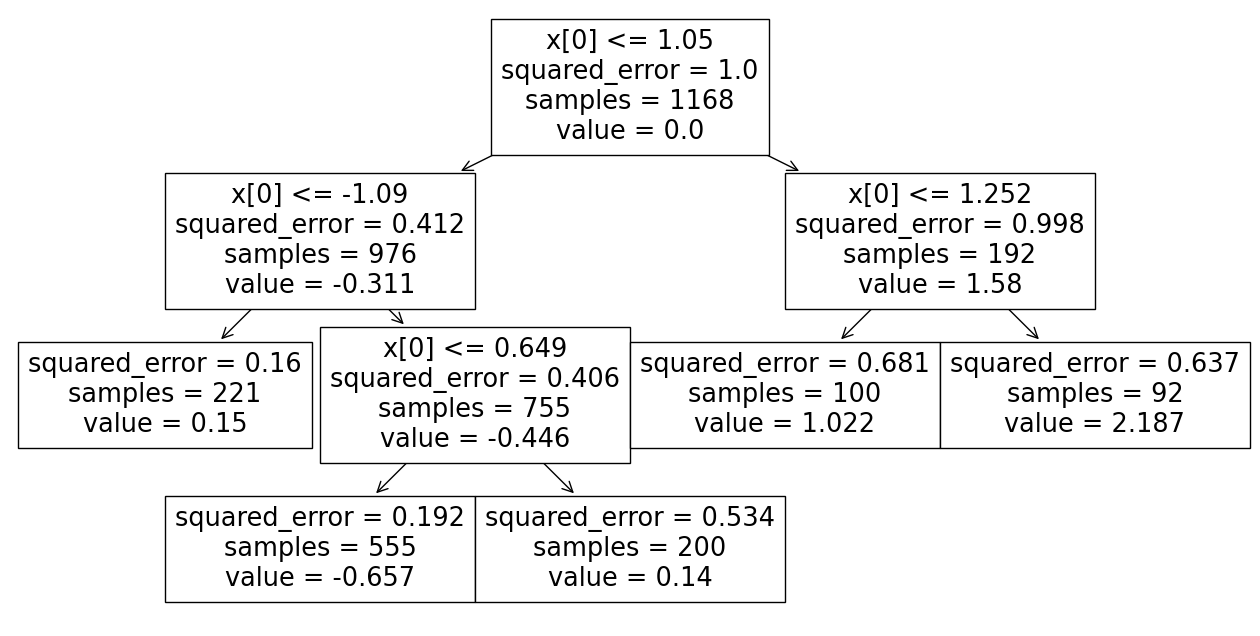

In [48]:
plt.figure(figsize=(16, 8))
tree.plot_tree(reg);

In [49]:
reg.score(x_train, y_train), reg.score(x_test, y_test)

(0.6786002767516198, 0.6102814513496133)

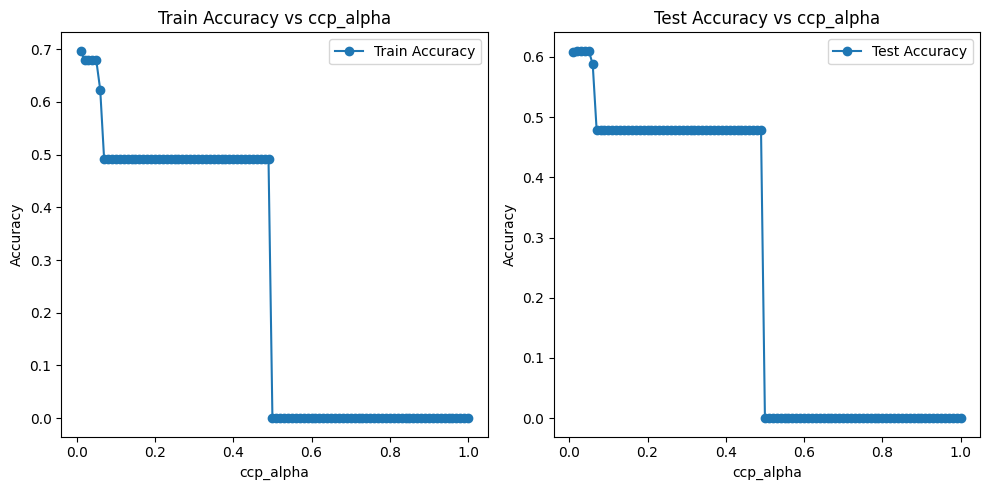

ccp_alpha: 0.01 | Train Accuracy: 0.6972 | Test Accuracy: 0.6077
ccp_alpha: 0.02 | Train Accuracy: 0.6786 | Test Accuracy: 0.6103
ccp_alpha: 0.03 | Train Accuracy: 0.6786 | Test Accuracy: 0.6103
ccp_alpha: 0.04 | Train Accuracy: 0.6786 | Test Accuracy: 0.6103
ccp_alpha: 0.05 | Train Accuracy: 0.6786 | Test Accuracy: 0.6103
ccp_alpha: 0.06 | Train Accuracy: 0.6229 | Test Accuracy: 0.5875
ccp_alpha: 0.07 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
ccp_alpha: 0.08 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
ccp_alpha: 0.09 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
ccp_alpha: 0.10 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
ccp_alpha: 0.11 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
ccp_alpha: 0.12 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
ccp_alpha: 0.13 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
ccp_alpha: 0.14 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
ccp_alpha: 0.15 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
ccp_alpha: 0.16 | Train A

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

# Load the datasets
df_train = pd.read_csv('/content/energy-train-l.csv')
df_test = pd.read_csv('/content/energy-test-l.csv')
train_set = np.array(df_train)
test_set = np.array(df_test)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

# Initialize lists to store accuracies
ccp_alpha_values = np.arange(0.01, 1.01, 0.01)
train_accuracies = []
test_accuracies = []

# Train the model with different ccp_alpha values and store the accuracies
for alpha in ccp_alpha_values:
    reg = tree.DecisionTreeRegressor(max_depth=4, ccp_alpha=alpha)
    reg.fit(x_train, y_train)
    train_accuracies.append(reg.score(x_train, y_train))
    test_accuracies.append(reg.score(x_test, y_test))

# Plotting the accuracies
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(ccp_alpha_values, train_accuracies, marker='o', label='Train Accuracy')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs ccp_alpha')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ccp_alpha_values, test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs ccp_alpha')
plt.legend()

plt.tight_layout()
plt.show()

# Display accuracies in a formatted manner
for alpha, train_acc, test_acc in zip(ccp_alpha_values, train_accuracies, test_accuracies):
    print(f"ccp_alpha: {alpha:.2f} | Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")


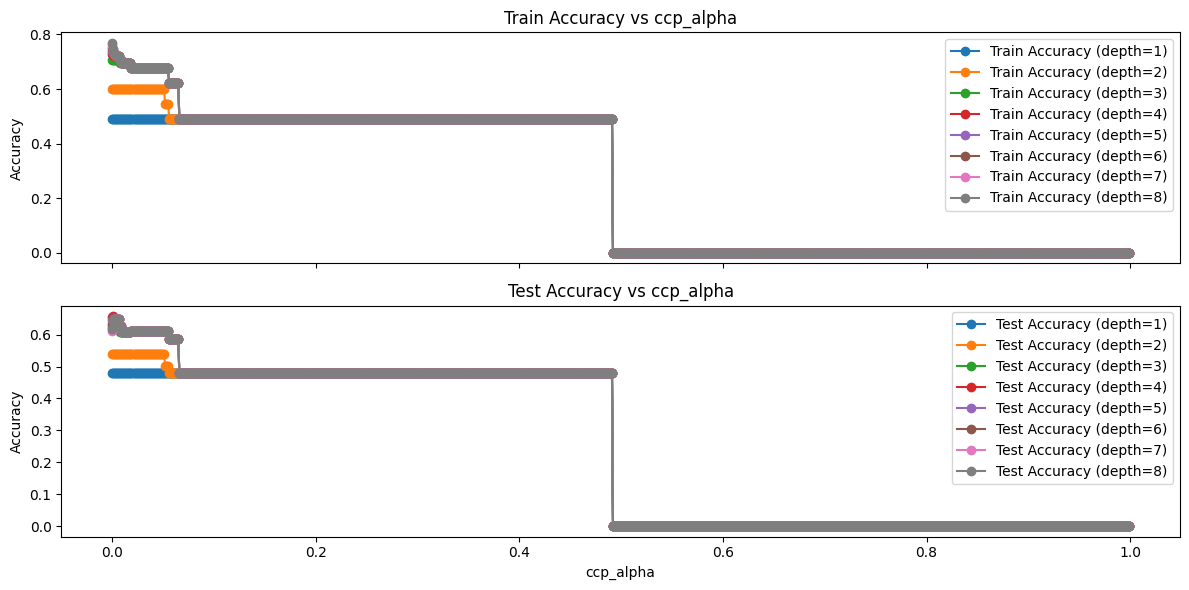

Streaming output truncated to the last 5000 lines.
max_depth: 4, ccp_alpha: 0.00 | Train Accuracy: 0.7266 | Test Accuracy: 0.6538
max_depth: 4, ccp_alpha: 0.00 | Train Accuracy: 0.7248 | Test Accuracy: 0.6581
max_depth: 4, ccp_alpha: 0.00 | Train Accuracy: 0.7211 | Test Accuracy: 0.6475
max_depth: 4, ccp_alpha: 0.00 | Train Accuracy: 0.7211 | Test Accuracy: 0.6475
max_depth: 4, ccp_alpha: 0.00 | Train Accuracy: 0.7211 | Test Accuracy: 0.6475
max_depth: 4, ccp_alpha: 0.01 | Train Accuracy: 0.7211 | Test Accuracy: 0.6475
max_depth: 4, ccp_alpha: 0.01 | Train Accuracy: 0.7211 | Test Accuracy: 0.6475
max_depth: 4, ccp_alpha: 0.01 | Train Accuracy: 0.7211 | Test Accuracy: 0.6475
max_depth: 4, ccp_alpha: 0.01 | Train Accuracy: 0.7064 | Test Accuracy: 0.6278
max_depth: 4, ccp_alpha: 0.01 | Train Accuracy: 0.7064 | Test Accuracy: 0.6278
max_depth: 4, ccp_alpha: 0.01 | Train Accuracy: 0.6972 | Test Accuracy: 0.6077
max_depth: 4, ccp_alpha: 0.01 | Train Accuracy: 0.6972 | Test Accuracy: 0.6077
m

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree


train_set = np.array(df_train)
test_set = np.array(df_test)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

# Initialize lists to store accuracies
ccp_alpha_values = np.arange(1e-5, 1, 1e-3)
max_depth_values = range(1, 9)
train_accuracies = []
test_accuracies = []

# Train the model with different max_depth and ccp_alpha values and store the accuracies
for depth in max_depth_values:
    for alpha in ccp_alpha_values:
        reg = tree.DecisionTreeRegressor(max_depth=depth, ccp_alpha=alpha)
        reg.fit(x_train, y_train)
        train_accuracies.append((depth, alpha, reg.score(x_train, y_train)))
        test_accuracies.append((depth, alpha, reg.score(x_test, y_test)))

# Plotting the accuracies
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

for depth in max_depth_values:
    train_acc = [acc[2] for acc in train_accuracies if acc[0] == depth]
    test_acc = [acc[2] for acc in test_accuracies if acc[0] == depth]
    axes[0].plot(ccp_alpha_values, train_acc, marker='o', label=f'Train Accuracy (depth={depth})')
    axes[1].plot(ccp_alpha_values, test_acc, marker='o', label=f'Test Accuracy (depth={depth})')

axes[0].set_ylabel('Accuracy')
axes[0].set_title('Train Accuracy vs ccp_alpha')
axes[0].legend()

axes[1].set_xlabel('ccp_alpha')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Test Accuracy vs ccp_alpha')
axes[1].legend()

plt.tight_layout()
plt.show()

# Display accuracies in a formatted manner
for depth in max_depth_values:
    for alpha in ccp_alpha_values:
        train_acc = [acc[2] for acc in train_accuracies if acc[0] == depth and acc[1] == alpha][0]
        test_acc = [acc[2] for acc in test_accuracies if acc[0] == depth and acc[1] == alpha][0]
        print(f"max_depth: {depth}, ccp_alpha: {alpha:.2f} | Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")

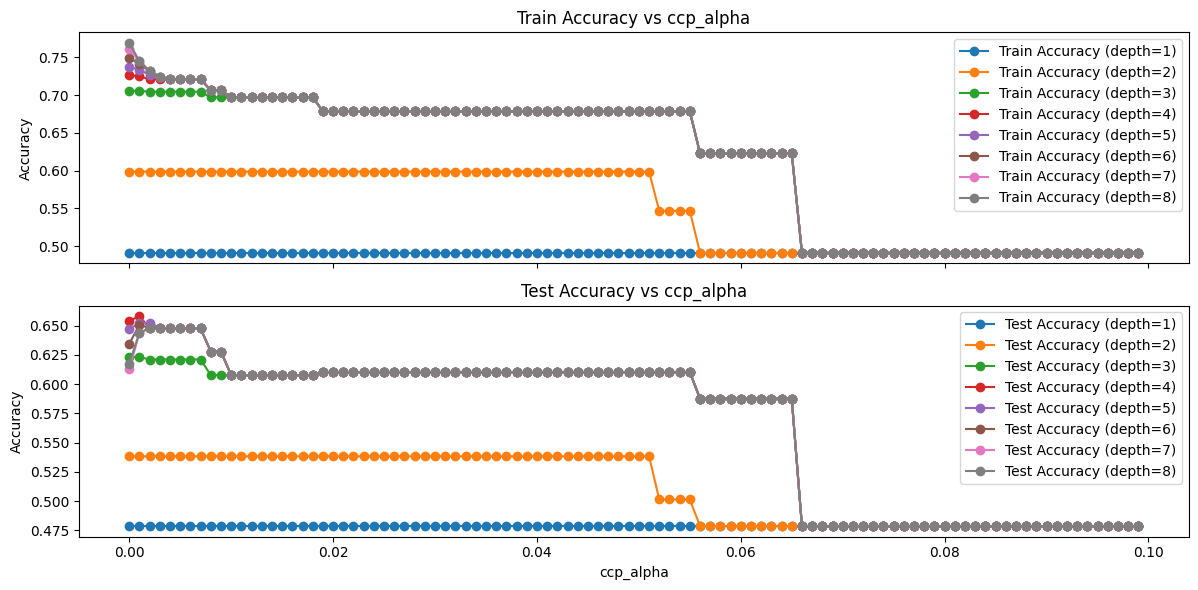

max_depth: 1, ccp_alpha: 0.00 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
max_depth: 1, ccp_alpha: 0.00 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
max_depth: 1, ccp_alpha: 0.00 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
max_depth: 1, ccp_alpha: 0.00 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
max_depth: 1, ccp_alpha: 0.00 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
max_depth: 1, ccp_alpha: 0.01 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
max_depth: 1, ccp_alpha: 0.01 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
max_depth: 1, ccp_alpha: 0.01 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
max_depth: 1, ccp_alpha: 0.01 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
max_depth: 1, ccp_alpha: 0.01 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
max_depth: 1, ccp_alpha: 0.01 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
max_depth: 1, ccp_alpha: 0.01 | Train Accuracy: 0.4912 | Test Accuracy: 0.4787
max_depth: 1, ccp_alpha: 0.01 | Train Accuracy: 0.49

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree


train_set = np.array(df_train)
test_set = np.array(df_test)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

# Initialize lists to store accuracies
ccp_alpha_values = np.arange(1e-5, 0.1, 1e-3)
max_depth_values = range(1, 9)
train_accuracies = []
test_accuracies = []

# Train the model with different max_depth and ccp_alpha values and store the accuracies
for depth in max_depth_values:
    for alpha in ccp_alpha_values:
        reg = tree.DecisionTreeRegressor(max_depth=depth, ccp_alpha=alpha)
        reg.fit(x_train, y_train)
        train_accuracies.append((depth, alpha, reg.score(x_train, y_train)))
        test_accuracies.append((depth, alpha, reg.score(x_test, y_test)))

# Plotting the accuracies
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

for depth in max_depth_values:
    train_acc = [acc[2] for acc in train_accuracies if acc[0] == depth]
    test_acc = [acc[2] for acc in test_accuracies if acc[0] == depth]
    axes[0].plot(ccp_alpha_values, train_acc, marker='o', label=f'Train Accuracy (depth={depth})')
    axes[1].plot(ccp_alpha_values, test_acc, marker='o', label=f'Test Accuracy (depth={depth})')

axes[0].set_ylabel('Accuracy')
axes[0].set_title('Train Accuracy vs ccp_alpha')
axes[0].legend()

axes[1].set_xlabel('ccp_alpha')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Test Accuracy vs ccp_alpha')
axes[1].legend()

plt.tight_layout()
plt.show()

# Display accuracies in a formatted manner
for depth in max_depth_values:
    for alpha in ccp_alpha_values:
        train_acc = [acc[2] for acc in train_accuracies if acc[0] == depth and acc[1] == alpha][0]
        test_acc = [acc[2] for acc in test_accuracies if acc[0] == depth and acc[1] == alpha][0]
        print(f"max_depth: {depth}, ccp_alpha: {alpha:.2f} | Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")


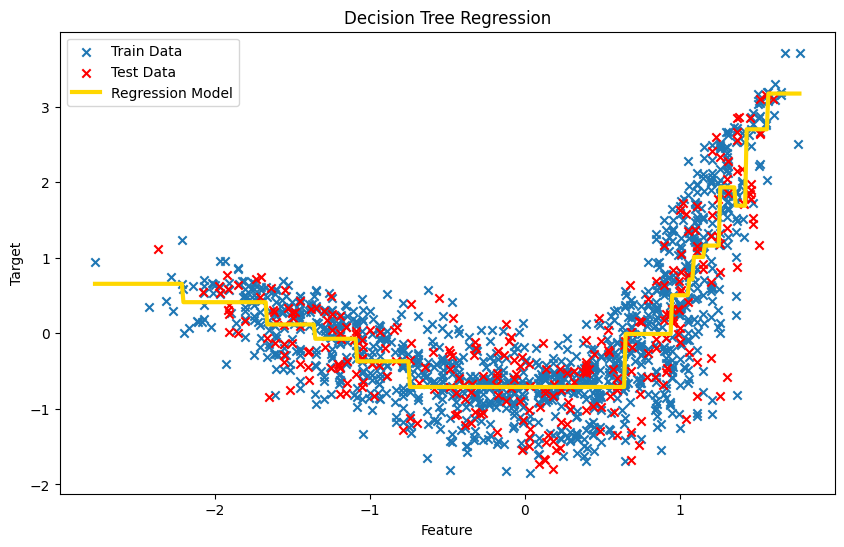

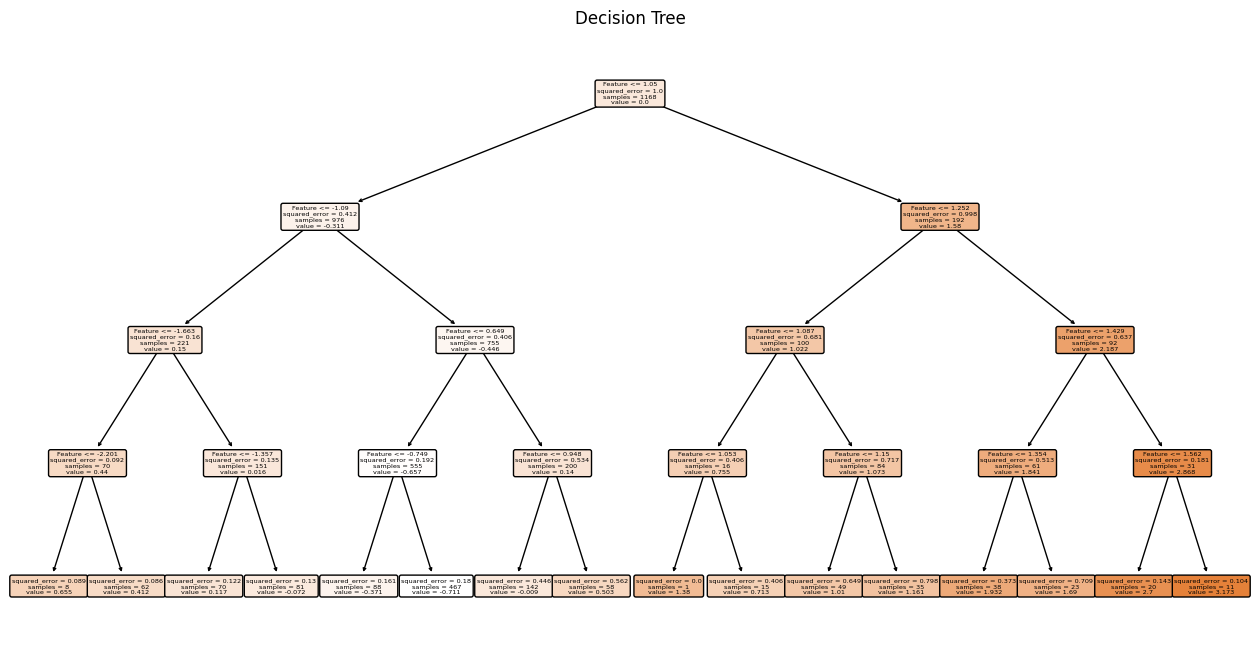

Train Accuracy: 0.7266
Test Accuracy: 0.6538


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree


train_set = np.array(df_train)
test_set = np.array(df_test)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

# Set parameters
max_depth = 4
ccp_alpha = 1e-5

# Train the model
reg = tree.DecisionTreeRegressor(max_depth=max_depth, ccp_alpha=ccp_alpha)
reg.fit(x_train, y_train)

# Generate data points for plotting
xp = np.arange(x_train.min(), x_train.max(), 0.01)[:, np.newaxis]
yp = reg.predict(xp)

# Plot the data and the regression model
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, marker='x', label='Train Data')
plt.scatter(x_test, y_test, c='r', marker='x', label='Test Data')
plt.plot(xp, yp, color='gold', linewidth=3, label='Regression Model')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Decision Tree Regression')
plt.show()

# Plot the decision tree
plt.figure(figsize=(16, 8))
tree.plot_tree(reg, filled=True, feature_names=['Feature'], rounded=True)
plt.title('Decision Tree')
plt.show()

# Print train and test accuracy
train_accuracy = reg.score(x_train, y_train)
test_accuracy = reg.score(x_test, y_test)
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
